# p1

## *SVM with A1_p3 Data*

In [3]:
import numpy as np
from libsvm.svmutil import *
from matplotlib import pyplot as plt

In [4]:
# Train Data
with open('p3_train.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)
Data = np.array(results[0:40000])

In [5]:
with open('p3_test.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)
Data_test = np.array(results)
Data_Y_test = Data_test[:,10].astype(int)
Data_X_test = np.delete(Data_test, 10, axis = 1)

In [6]:
val_size = 0.5

# calculate the number of validation data rows
val_rows = int(val_size * Data.shape[0])

# shuffle the data
np.random.shuffle(Data)

# split the data into train and validation sets
Data_train = Data[val_rows:]
Data_Y_train = Data_train[:,10].astype(int)
Data_X_train = np.delete(Data_train, 10, axis = 1)
Data_val = Data[:val_rows]
Data_val=np.array(Data_val)
Data_Y_val = Data_val[:,10].astype(int)
Data_X_val = np.delete(Data_val, 10, axis = 1)

In [7]:
print(Data_X_train.shape)
print(Data_X_val.shape)
print(Data_Y_train.shape)
print(Data_Y_val.shape)
print(Data_X_test.shape)
print(Data_Y_test.shape)

(20000, 10)
(20000, 10)
(20000,)
(20000,)
(15000, 10)
(15000,)


In [6]:
def create_onevsrest(Data_train):
    labels = np.unique(Data_train[:,10].astype(int))
    X_train={x: [] for x in labels}
    Y_train={x: [] for x in labels}
    ovr_data = []
    for i in range(1,len(labels)+1):
        for j in range(len(Data_train)):
            X_train[i].append(Data_train[j][0:10])
            if int(Data_train[j][10])!=i:
                Y_train[i].append(-1)
            else:
                Y_train[i].append(1)
                
    for i in range(1,len(labels)+1):
        X_train[i]=np.array(X_train[i])
        Y_train[i]=np.array(Y_train[i])
        Y_train[i].reshape((Y_train[i].shape[0],1))
    
    return X_train,Y_train


In [16]:
data_ovr_X_train,data_ovr_Y_train=create_onevsrest(Data_train)

In [12]:
def get_models(data_ovr_X_train,data_ovr_Y_train,param_str,classes):
    models=[]
    for i in range(1,classes+1):
        prob  = svm_problem(data_ovr_Y_train[i], data_ovr_X_train[i])
        param = svm_parameter(param_str)
        m = svm_train(prob, param,'-e 1')
        models.append(m)
    return models

In [13]:
def testSVM(Data_X_t,Data_Y_t,noofclasses,models):
    Pred_Y_test=[]
    predlist=[]
    for i in range(1,noofclasses+1):
        Data_Y_t_new=[1 if k==i else -1 for k in Data_Y_t]
        _,_, p_val = svm_predict(Data_Y_t_new, Data_X_t, models[i-1], '-b 1')
        p_val=np.array(p_val)
        predlist.append(p_val[:,0])
    predlist=np.array(predlist).T
    #print(predlist)
    for j in range(len(Data_X_t)):
        Pred_Y_test.append(np.argmax(predlist[j,:])+1)     
    correct_count=0
    for i in range(len(Data_X_t)):
        if Pred_Y_test[i]==Data_Y_t[i]:
            correct_count+=1
    print("Accuracy for OvR:",correct_count/len(Data_X_t))
    return correct_count/len(Data_X_t)

### GAUSSIAN KERNEL

In [142]:
C_range = [0.1,1,3,10,50]
gamma_range = [0.001,0.01,0.05,0.1,0.15]

best_acc = 0
best_C = 0
best_gamma = 0
accuracies=np.zeros((5,5))
i=-1
j=-1
# Loop over all combinations of C and gamma
for C in C_range:
    i+=1
    j=-1
    for gamma in gamma_range:
        j+=1
        print("C:",C,end=' ')
        print("Gamma:",gamma)
        # Train an SVM model on the training data
        param_str = f'-t 2 -c {C} -g {gamma} -b 1'
        prob = svm_parameter(param_str)
        models = get_models(data_ovr_X_train,data_ovr_Y_train,param_str,5)

        # Test the model on the validation data
        acc = testSVM(Data_X_val,Data_Y_val,5, models)
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
        accuracies[i][j]=acc
        print('----------')
        

# Print the best parameters and accuracy found
print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best validation accuracy: {best_acc:.2%}")

C: 0.1 Gamma: 0.001
Accuracy = 83.53% (16706/20000) (classification)
Accuracy = 84.935% (16987/20000) (classification)
Accuracy = 87.495% (17499/20000) (classification)
Accuracy = 86.2% (17240/20000) (classification)
Accuracy = 84.59% (16918/20000) (classification)
Accuracy for OvR: 0.57035
----------
C: 0.1 Gamma: 0.01
Accuracy = 83.895% (16779/20000) (classification)
Accuracy = 85.35% (17070/20000) (classification)
Accuracy = 87.9% (17580/20000) (classification)
Accuracy = 86.615% (17323/20000) (classification)
Accuracy = 85.19% (17038/20000) (classification)
Accuracy for OvR: 0.5814
----------
C: 0.1 Gamma: 0.05
Accuracy = 84.07% (16814/20000) (classification)
Accuracy = 85.4% (17080/20000) (classification)
Accuracy = 87.945% (17589/20000) (classification)
Accuracy = 86.765% (17353/20000) (classification)
Accuracy = 85.405% (17081/20000) (classification)
Accuracy for OvR: 0.5832
----------
C: 0.1 Gamma: 0.1
Accuracy = 84.01% (16802/20000) (classification)
Accuracy = 85.52% (17104/20

##### Grid search plot for gaussian kernel ('c' and 'gamma' vs validation accuracy)

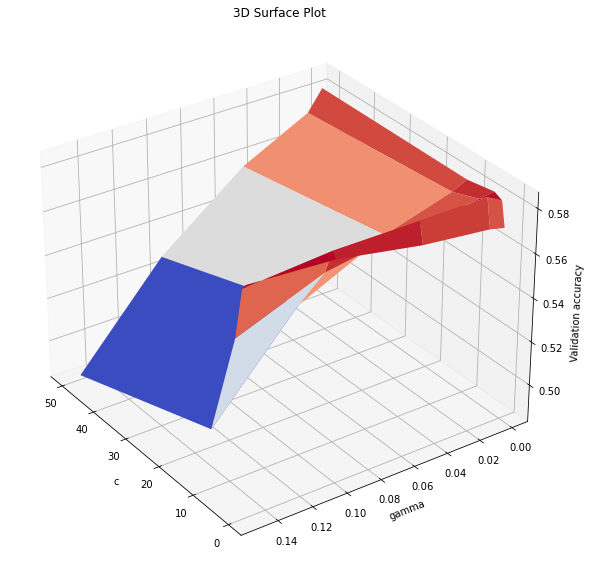

In [163]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# create data for surface plot
X = C_range
Y = gamma_range
X, Y = np.meshgrid(X, Y)

Z = accuracies

# plot surface
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# set labels and title
ax.set_xlabel('c')
ax.set_ylabel('gamma')
ax.set_zlabel('Validation accuracy')
ax.set_title('3D Surface Plot')

ax.view_init(elev=30, azim=145)
# show plot
plt.show()

#### Test accuracy with C ,gamma after grid search

In [17]:
param_str = f'-t 2 -c {best_C} -g {best_gamma} -b 1'
prob = svm_parameter(param_str)
models = get_models(data_ovr_X_train,data_ovr_Y_train,param_str,5)


In [18]:
acc = testSVM(Data_X_test,Data_Y_test,5, models)

Accuracy = 84.48% (12672/15000) (classification)
Accuracy = 85.2467% (12787/15000) (classification)
Accuracy = 87.4933% (13124/15000) (classification)
Accuracy = 86.6933% (13004/15000) (classification)
Accuracy = 85.44% (12816/15000) (classification)
Accuracy for OvR: 0.5808666666666666


##### B)Without Slack

In [19]:
c=np.inf
param_str = f'-t 2 -c {c} -g {best_gamma} -b 1'
prob = svm_parameter(param_str)
models = get_models(data_ovr_X_train,data_ovr_Y_train,param_str,5)



In [20]:
acc = testSVM(Data_X_test,Data_Y_test,5, models)

Accuracy = 82.4467% (12367/15000) (classification)
Accuracy = 82.4733% (12371/15000) (classification)
Accuracy = 84.6533% (12698/15000) (classification)
Accuracy = 83.9867% (12598/15000) (classification)
Accuracy = 82.64% (12396/15000) (classification)
Accuracy for OvR: 0.49646666666666667


### POLYNOMIAL KERNEL

In [7]:
C_range = [0.1, 1, 2]
gamma_range = [0.001, 0.01, 0.1, 1]
degree_range = [2, 3, 4]

# Perform grid search
best_accuracy = 0
for degree in degree_range:
    for gamma in gamma_range:
        for C in C_range:
            print("C:",C)
            print("Gamma:",gamma)
            print("Degree:",degree)
            # Train model
            param_str = f'-t 1 -d {degree} -c {C} -g {gamma}'
            model = svm_train(Data_Y_train, Data_X_train, param_str)

            # Evaluate model
            _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val, model)
            if accuracy[0] > best_accuracy:
                best_accuracy = accuracy[0]
                best_params = {'C': C, 'gamma': gamma, 'degree': degree}
            print('-----------------')

print(f'Best Validation accuracy: {best_accuracy:.2f} with params: {best_params}')

C: 0.1
Gamma: 0.001
Degree: 2
Accuracy = 19.845% (3969/20000) (classification)
-----------------
C: 1
Gamma: 0.001
Degree: 2
Accuracy = 23.37% (4674/20000) (classification)
-----------------
C: 2
Gamma: 0.001
Degree: 2
Accuracy = 36.685% (7337/20000) (classification)
-----------------
C: 0.1
Gamma: 0.01
Degree: 2
Accuracy = 48.35% (9670/20000) (classification)
-----------------
C: 1
Gamma: 0.01
Degree: 2
Accuracy = 51.24% (10248/20000) (classification)
-----------------
C: 2
Gamma: 0.01
Degree: 2
Accuracy = 51.64% (10328/20000) (classification)
-----------------
C: 0.1
Gamma: 0.1
Degree: 2
Accuracy = 51.865% (10373/20000) (classification)
-----------------
C: 1
Gamma: 0.1
Degree: 2
Accuracy = 51.96% (10392/20000) (classification)
-----------------
C: 2
Gamma: 0.1
Degree: 2
Accuracy = 51.94% (10388/20000) (classification)
-----------------
C: 0.1
Gamma: 1
Degree: 2
Accuracy = 51.92% (10384/20000) (classification)
-----------------
C: 1
Gamma: 1
Degree: 2
Accuracy = 51.925% (10385/20000)

#### Test accuracy with C ,gamma,degree after grid search

In [5]:
best_C=best_params['C']
best_gamma=best_params['gamma']
best_degree=best_params['degree']
param_str = f'-t 1 -d {best_degree} -c {best_C} -g {best_gamma} -e 1'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [6]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)


Accuracy = 57.0933% (8564/15000) (classification)


##### B)Without Slack(C=INF)

In [8]:
c_val=1e6
param_str = f'-t 1 -d 3 -c {c_val} -g 0.001 -e 1'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [9]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 56.5533% (8483/15000) (classification)


### LINEAR KERNEL


In [22]:
c_values = [1e-6,1e-5,1e-4,0.001,0.01,0.1,1]
accuracy_list = []
best_c=-1
best_accuracy=-np.inf
# perform grid search
for c in c_values:
    print("c:",c)
    param = f'-s 0 -t 0 -c {c}'
    model = svm_train(Data_Y_train, Data_X_train,param)
      # Evaluate model
    _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val,model)
    accuracy_list.append(accuracy[0])
    if accuracy[0] > best_accuracy:
        best_accuracy = accuracy[0]
        best_c=c
    print('-----------------')


print(f'Best Validation accuracy: {best_accuracy:.2f} with c: {best_c}')

# train svm model
param = f'-s 0 -t 0 -c {best_c}'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param)



c: 1e-06
Accuracy = 19.835% (3967/20000) (classification)
-----------------
c: 1e-05
Accuracy = 19.835% (3967/20000) (classification)
-----------------
c: 0.0001
Accuracy = 57.345% (11469/20000) (classification)
-----------------
c: 0.001
Accuracy = 56.715% (11343/20000) (classification)
-----------------
c: 0.01
Accuracy = 56.445% (11289/20000) (classification)
-----------------
c: 0.1
Accuracy = 56.435% (11287/20000) (classification)
-----------------
c: 1
Accuracy = 56.435% (11287/20000) (classification)
-----------------
Best Validation accuracy: 57.34 with c: 0.0001


##### Grid search plot for linear kernel ('c' vs validation accuracy)

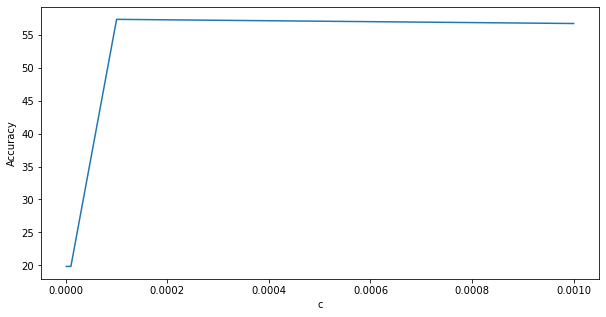

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.plot(c_values[0:4],accuracy_list[0:4])
#grid search plot for c is given below

In [16]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 57.0333% (8555/15000) (classification)


In [8]:
# train svm model
c=1e2
param = f'-s 0 -t 0 -c {c} -e 1'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param)

In [9]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 56.2133% (8432/15000) (classification)


## *SVM with A1_p4 Data*

In [1]:
import numpy as np
from libsvm.svmutil import *
from matplotlib import pyplot as plt

In [2]:
def minmaxNormalize(X):
    X_norm = X
    for i in range(1,X.shape[1]):
        if np.max(X[:,i]) != np.min(X[:,i]):
            X_norm[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
#         elif np.max(X[:,i] == np.min(X[:,i])):
#             X_norm[:,i] = np.ones(X_norm[:,i].shape)
    return X_norm

In [20]:
def get_train_test_split(csv_file,test_percent):
    
    with open(csv_file, 'r') as f:
        results = []
        next(f)
        for line in f:
            words = line.split(',')
            for i in range(len(words)):
                words[i] = float(words[i])
            results.append(words)
    Data_f = np.array(results[0:30000])   
    Data=minmaxNormalize(Data_f)
    val_size = test_percent/100
    # calculate the number of validation data rows
    val_rows = int(val_size * Data.shape[0])


    # split the data into train and validation sets
    Data_train = Data[val_rows:]
    Data_train=np.array(Data_train)
    Data_Y_train = Data_train[:,0].astype(int)
    Data_X_train = np.delete(Data_train, 0, axis = 1)
    #
    Data_test = Data[:val_rows]
    Data_test=np.array(Data_test)
    Data_Y_test = Data_test[:,0].astype(int)
    Data_X_test = np.delete(Data_test, 0, axis = 1)
    return Data_X_train,Data_Y_train,Data_X_test,Data_Y_test
    

In [21]:
Data_X_train_val,Data_Y_train_val,Data_X_test,Data_Y_test=get_train_test_split('p4_train.csv',30)

In [22]:
val_size = 0.2
# calculate the number of validation data rows
val_rows = int(val_size * Data_X_train_val.shape[0])

# split the data into train and validation sets

Data_Y_train = Data_Y_train_val[val_rows:]
Data_X_train = Data_X_train_val[val_rows:]

Data_Y_val = Data_Y_train_val[:val_rows]
Data_X_val = Data_X_train_val[:val_rows]

In [23]:
print(Data_X_train.shape)
print(Data_X_val.shape)
print(Data_Y_train.shape)
print(Data_Y_val.shape)
print(Data_X_test.shape)
print(Data_Y_test.shape)

(16800, 784)
(4200, 784)
(16800,)
(4200,)
(9000, 784)
(9000,)


In [7]:
def create_onevsrest(Data_train):
    labels = np.unique(Data_train[:,10].astype(int))
    X_train={x: [] for x in labels}
    Y_train={x: [] for x in labels}
    ovr_data = []
    for i in range(1,len(labels)+1):
        for j in range(len(Data_train)):
            X_train[i].append(Data_train[j][0:10])
            if int(Data_train[j][10])!=i:
                Y_train[i].append(-1)
            else:
                Y_train[i].append(1)
                
    for i in range(1,len(labels)+1):
        X_train[i]=np.array(X_train[i])
        Y_train[i]=np.array(Y_train[i])
        Y_train[i].reshape((Y_train[i].shape[0],1))
    
    return X_train,Y_train


In [ ]:
def get_models(data_ovr_X_train,data_ovr_Y_train,param_str,classes):
    prob  = svm_problem(data_ovr_Y_train, data_ovr_X_train)
    param = svm_parameter(param_str)
    m = svm_train(prob, param,'-e 1')
    return m      

In [ ]:
def testSVM(Data_X_t,Data_Y_t,noofclasses,models):
    Pred_Y_test,_,_=svm_predict(Data_Y_t, Data_X_t, models, '-b 1')
    correct_count=0
    for i in range(len(Data_X_t)):
        if Pred_Y_test[i]==Data_Y_t[i]:
            correct_count+=1
    return correct_count/len(Data_X_t)

### Gaussian Kernel

###### A)With Slack

In [10]:
C_range = np.arange(1, 10, 2)
gamma_range = np.arange(0.1,1, 0.2)

best_acc = 0
best_C = 0
best_gamma = 0
accuracies=np.zeros((5,5))
i=-1
j=-1
# Loop over all combinations of C and gamma
for C in C_range:
    i+=1
    j=-1
    for gamma in gamma_range:
        j+=1
        print("C:",C,end=' ')
        print("Gamma:",gamma)
        # Train an SVM model on the training data
        param_str = f'-t 2 -c {C} -g {gamma} -b 1'
        prob = svm_parameter(param_str)
        model= get_models(Data_X_train,Data_Y_train,param_str,5)

        # Test the model on the validation data
        acc = testSVM(Data_X_val,Data_Y_val,5, model)
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
        accuracies[i][j]=acc
        

# Print the best parameters and accuracy found
print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best validation accuracy: {best_acc:.2%}")

C: 1 Gamma: 0.1
Accuracy = 93.8333% (3941/4200) (classification)
C: 1 Gamma: 0.30000000000000004
Accuracy = 63.0476% (2648/4200) (classification)
C: 1 Gamma: 0.5000000000000001
Accuracy = 32.881% (1381/4200) (classification)
C: 1 Gamma: 0.7000000000000001
Accuracy = 11.1667% (469/4200) (classification)
C: 1 Gamma: 0.9000000000000001
Accuracy = 10.2619% (431/4200) (classification)
C: 3 Gamma: 0.1
Accuracy = 93.9048% (3944/4200) (classification)
C: 3 Gamma: 0.30000000000000004
Accuracy = 64.9286% (2727/4200) (classification)
C: 3 Gamma: 0.5000000000000001
Accuracy = 36.2381% (1522/4200) (classification)
C: 3 Gamma: 0.7000000000000001
Accuracy = 15.8095% (664/4200) (classification)
C: 3 Gamma: 0.9000000000000001
Accuracy = 10.2619% (431/4200) (classification)
C: 5 Gamma: 0.1
Accuracy = 93.9524% (3946/4200) (classification)
C: 5 Gamma: 0.30000000000000004
Accuracy = 64.3333% (2702/4200) (classification)
C: 5 Gamma: 0.5000000000000001
Accuracy = 35.1905% (1478/4200) (classification)
C: 5 Ga

In [90]:
C_range = np.arange(1, 10, 2)
gamma_range = np.arange(0.05,0.15, 0.02)

best_acc = 0
best_C = 0
best_gamma = 0
accuracies=np.zeros((5,5))
i=-1
j=-1
# Loop over all combinations of C and gamma
for C in C_range:
    i+=1
    j=-1
    for gamma in gamma_range:
        j+=1
        print("C:",C,end=' ')
        print("Gamma:",gamma)
        # Train an SVM model on the training data
        param_str = f'-t 2 -c {C} -g {gamma} -b 1'
        prob = svm_parameter(param_str)
        model= get_models(Data_X_train,Data_Y_train,param_str,5)

        # Test the model on the validation data
        acc = testSVM(Data_X_val,Data_Y_val,5, model)
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
        accuracies[i][j]=acc 
        

# Print the best parameters and accuracy found
print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best validation accuracy: {best_acc:.2%}")

C: 1 Gamma: 0.05
Accuracy = 95.2381% (4000/4200) (classification)
C: 1 Gamma: 0.07
Accuracy = 94.8571% (3984/4200) (classification)
C: 1 Gamma: 0.09000000000000001
Accuracy = 94.381% (3964/4200) (classification)
C: 1 Gamma: 0.11000000000000001
Accuracy = 93.3333% (3920/4200) (classification)
C: 1 Gamma: 0.13
Accuracy = 91.9524% (3862/4200) (classification)
C: 3 Gamma: 0.05
Accuracy = 95.3333% (4004/4200) (classification)
C: 3 Gamma: 0.07
Accuracy = 94.881% (3985/4200) (classification)
C: 3 Gamma: 0.09000000000000001
Accuracy = 94.4048% (3965/4200) (classification)
C: 3 Gamma: 0.11000000000000001
Accuracy = 93.5238% (3928/4200) (classification)
C: 3 Gamma: 0.13
Accuracy = 92.0476% (3866/4200) (classification)
C: 5 Gamma: 0.05
Accuracy = 95.3095% (4003/4200) (classification)
C: 5 Gamma: 0.07
Accuracy = 94.9048% (3986/4200) (classification)
C: 5 Gamma: 0.09000000000000001
Accuracy = 94.4048% (3965/4200) (classification)
C: 5 Gamma: 0.11000000000000001
Accuracy = 93.5238% (3928/4200) (clas

##### Grid search plot for gaussian kernel ('c' and 'gamma' vs validation accuracy)

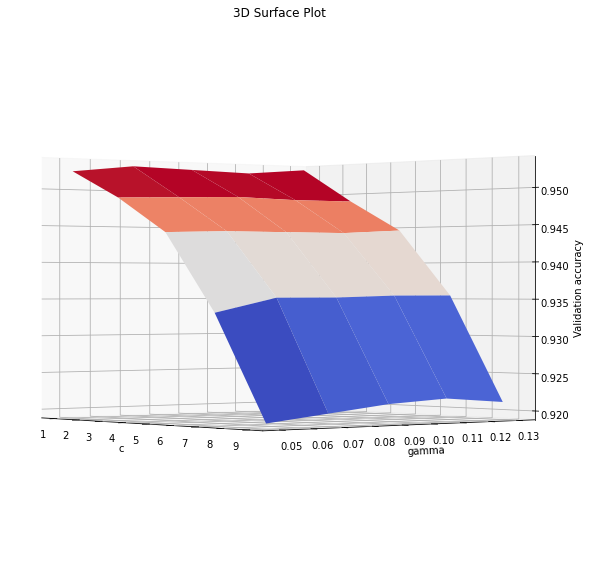

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# create data for surface plot
X = C_range
Y = gamma_range
X, Y = np.meshgrid(X, Y)

Z = accuracies

# plot surface
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# set labels and title
ax.set_xlabel('c')
ax.set_ylabel('gamma')
ax.set_zlabel('Validation accuracy')
ax.set_title('3D Surface Plot')

ax.view_init(elev=0, azim=-40)
# show plot
plt.show()

###### Test accuracy with C and gamma after grid search

In [98]:
param_str = f'-t 2 -c {best_C} -g {best_gamma} -b 1'
prob = svm_parameter(param_str)
model = get_models(Data_X_train,Data_Y_train,param_str,5)

In [99]:
acc = testSVM(Data_X_test,Data_Y_test,5, model)

Accuracy = 93.4667% (8412/9000) (classification)


##### B)Without Slack(C=INF)

In [103]:
c_value=np.inf

In [111]:
param_str = f'-t 2 -c {c_value} -g {best_gamma} -b 1'
prob = svm_problem(Data_Y_train,Data_X_train)
param = svm_parameter(param_str)
model = svm_train(prob,param,'-e 1')

In [112]:
acc = testSVM(Data_X_test,Data_Y_test,5, model)

Accuracy = 93.4778% (8413/9000) (classification)


### POLYNOMIAL KERNEL

In [77]:
C_range = [0.1, 1, 10]
gamma_range = [0.001, 0.01, 0.1, 1]
degree_range = [2, 3, 4]

# Perform grid search
best_accuracy = 0
for degree in degree_range:
    for gamma in gamma_range:
        for C in C_range:
            print("C:",C)
            print("Gamma:",gamma)
            print("Degree:",degree)
            # Train model
            param_str = f'-t 1 -d {degree} -c {C} -g {gamma}'
            model = svm_train(Data_Y_train, Data_X_train, param_str)

            # Evaluate model
            _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val, model)
            if accuracy[0] > best_accuracy:
                best_accuracy = accuracy[0]
                best_params = {'C': C, 'gamma': gamma, 'degree': degree}
            print('-----------------')

print(f'Best Validation accuracy: {best_accuracy:.2f} with params: {best_params}')

C: 0.1
Gamma: 0.001
Degree: 2
Accuracy = 45.9762% (1931/4200) (classification)
-----------------
C: 1
Gamma: 0.001
Degree: 2
Accuracy = 65% (2730/4200) (classification)
-----------------
C: 10
Gamma: 0.001
Degree: 2
Accuracy = 88.881% (3733/4200) (classification)
-----------------
C: 0.1
Gamma: 0.01
Degree: 2
Accuracy = 88.881% (3733/4200) (classification)
-----------------
C: 1
Gamma: 0.01
Degree: 2
Accuracy = 93.881% (3943/4200) (classification)
-----------------
C: 10
Gamma: 0.01
Degree: 2
Accuracy = 94.8095% (3982/4200) (classification)
-----------------
C: 0.1
Gamma: 0.1
Degree: 2
Accuracy = 94.8095% (3982/4200) (classification)
-----------------
C: 1
Gamma: 0.1
Degree: 2
Accuracy = 94.9762% (3989/4200) (classification)
-----------------
C: 10
Gamma: 0.1
Degree: 2
Accuracy = 95% (3990/4200) (classification)
-----------------
C: 0.1
Gamma: 1
Degree: 2
Accuracy = 95% (3990/4200) (classification)
-----------------
C: 1
Gamma: 1
Degree: 2
Accuracy = 95% (3990/4200) (classification)
--

###### Test accuracy with C ,gamma,degree after grid search

In [59]:
best_C=best_params['C']
best_gamma=best_params['gamma']
best_degree=best_params['degree']
param_str = f'-t 1 -d {best_degree} -c {best_C} -g {best_gamma}'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [60]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 92.6222% (8336/9000) (classification)


##### B)Without Slack(C=INF)

In [78]:
c_val=np.inf
best_gamma=best_params['gamma']
best_degree=best_params['degree']
param_str = f'-t 1 -d 3 -c {c_val} -g 0.001'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [79]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 91.8111% (8263/9000) (classification)


### Linear kernel

In [136]:
c_values = [0.001,0.01,0.1,1,3,5]
accuracy_list = []
best_c=-1
best_accuracy=-np.inf
# perform grid search
for c in c_values:
    print("c:",c)
    param = f'-s 0 -t 0 -c {c}'
    model = svm_train(Data_Y_train, Data_X_train,param)
      # Evaluate model
    _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val,model)
    accuracy_list.append(accuracy[0])
    if accuracy[0] > best_accuracy:
        best_accuracy = accuracy[0]
        best_c=c
    print('-----------------')


print(f'Best Validation accuracy: {best_accuracy:.2f} with c: {best_c}')

# train svm model
param = f'-s 0 -t 0 -c {best_c}'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param)

c: 0.001
Accuracy = 91.7381% (3853/4200) (classification)
-----------------
c: 0.01
Accuracy = 93.2381% (3916/4200) (classification)
-----------------
c: 0.1
Accuracy = 92.9524% (3904/4200) (classification)
-----------------
c: 1
Accuracy = 92.9048% (3902/4200) (classification)
-----------------
c: 3
Accuracy = 92.7857% (3897/4200) (classification)
-----------------
c: 5
Accuracy = 92.6905% (3893/4200) (classification)
-----------------
Best Validation accuracy: 93.24 with c: 0.01


##### Grid search plot for linear kernel ('c' vs validation accuracy)

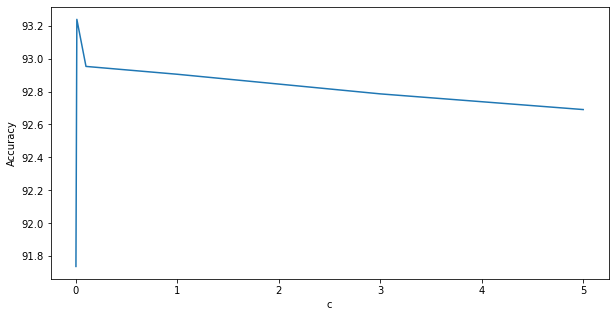

In [146]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.plot(c_values,accuracy_list)

##### Test accuracy with C after grid search 

In [138]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 91.4778% (8233/9000) (classification)


###### B)Without Slack(C=INF)

In [139]:
# train svm model
c=np.inf
param = f'-s 0 -t 0 -c {c}'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param)

In [140]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 90.4778% (8143/9000) (classification)


## *SVM with A1_p5 Data*

In [9]:
import numpy as np
from libsvm.svmutil import *
from matplotlib import pyplot as plt

In [10]:
def minmaxNormalize(X):
    X_norm = X
    for i in range(1,X.shape[1]):
        if np.max(X[:,i]) != np.min(X[:,i]):
            X_norm[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
#         elif np.max(X[:,i] == np.min(X[:,i])):
#             X_norm[:,i] = np.ones(X_norm[:,i].shape)
    return X_norm

In [11]:
def get_train_test_split(csv_file,test_percent):
    
    with open(csv_file, 'r') as f:
        results = []
        next(f)
        for line in f:
            words = line.split(',')
            for i in range(len(words)):
                words[i] = float(words[i])
            results.append(words)
    Data_f = np.array(results[0:30000])   
    Data=minmaxNormalize(Data_f)
    val_size = test_percent/100
    # calculate the number of validation data rows
    val_rows = int(val_size * Data.shape[0])


    # split the data into train and validation sets
    Data_train = Data[val_rows:]
    Data_train=np.array(Data_train)
    Data_Y_train = Data_train[:,0].astype(int)
    Data_X_train = np.delete(Data_train, 0, axis = 1)
    #
    Data_test = Data[:val_rows]
    Data_test=np.array(Data_test)
    Data_Y_test = Data_test[:,0].astype(int)
    Data_X_test = np.delete(Data_test, 0, axis = 1)
    return Data_X_train,Data_Y_train,Data_X_test,Data_Y_test
    

In [5]:
Data_X_train_val,Data_Y_train_val,Data_X_test,Data_Y_test=get_train_test_split('PCA_MNIST.csv',30)

In [6]:
val_size = 0.2
# calculate the number of validation data rows
val_rows = int(val_size * Data_X_train_val.shape[0])

# split the data into train and validation sets

Data_Y_train = Data_Y_train_val[val_rows:]
Data_X_train = Data_X_train_val[val_rows:]

Data_Y_val = Data_Y_train_val[:val_rows]
Data_X_val = Data_X_train_val[:val_rows]

In [7]:
print(Data_X_train.shape)
print(Data_X_val.shape)
print(Data_Y_train.shape)
print(Data_Y_val.shape)
print(Data_X_test.shape)
print(Data_Y_test.shape)

(16800, 10)
(4200, 10)
(16800,)
(4200,)
(9000, 10)
(9000,)


In [7]:
def create_onevsrest(Data_train):
    labels = np.unique(Data_train[:,10].astype(int))
    X_train={x: [] for x in labels}
    Y_train={x: [] for x in labels}
    ovr_data = []
    for i in range(1,len(labels)+1):
        for j in range(len(Data_train)):
            X_train[i].append(Data_train[j][0:10])
            if int(Data_train[j][10])!=i:
                Y_train[i].append(-1)
            else:
                Y_train[i].append(1)
                
    for i in range(1,len(labels)+1):
        X_train[i]=np.array(X_train[i])
        Y_train[i]=np.array(Y_train[i])
        Y_train[i].reshape((Y_train[i].shape[0],1))
    
    return X_train,Y_train


In [8]:
def get_models(data_ovr_X_train,data_ovr_Y_train,param_str,classes):
    prob  = svm_problem(data_ovr_Y_train, data_ovr_X_train)
    param = svm_parameter(param_str)
    m = svm_train(prob, param,'-e 1')
    return m      

In [9]:
def testSVM(Data_X_t,Data_Y_t,noofclasses,models):
    Pred_Y_test,_,_=svm_predict(Data_Y_t, Data_X_t, models, '-b 1')
    correct_count=0
    for i in range(len(Data_X_t)):
        if Pred_Y_test[i]==Data_Y_t[i]:
            correct_count+=1
    return correct_count/len(Data_X_t)

### Gaussian Kernel

###### A)With Slack

In [32]:
C_range = np.arange(1, 10, 2)
gamma_range = np.arange(0.1,1, 0.2)

best_acc = 0
best_C = 0
best_gamma = 0
accuracies=np.zeros((5,5))
i=-1
j=-1
# Loop over all combinations of C and gamma
for C in C_range:
    i+=1
    j=-1
    for gamma in gamma_range:
        j+=1
        print("C:",C,end=' ')
        print("Gamma:",gamma)
        # Train an SVM model on the training data
        param_str = f'-t 2 -c {C} -g {gamma} -b 1'
        prob = svm_parameter(param_str)
        model= get_models(Data_X_train,Data_Y_train,param_str,5)

        # Test the model on the validation data
        acc = testSVM(Data_X_val,Data_Y_val,5, model)
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
        accuracies[i][j]=acc
        print('----------------')
        

# Print the best parameters and accuracy found
print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best validation accuracy: {best_acc:.2%}")

C: 1 Gamma: 0.1
Accuracy = 88.3571% (3711/4200) (classification)
----------------
C: 1 Gamma: 0.30000000000000004
Accuracy = 89.2619% (3749/4200) (classification)
----------------
C: 1 Gamma: 0.5000000000000001
Accuracy = 89.9286% (3777/4200) (classification)
----------------
C: 1 Gamma: 0.7000000000000001
Accuracy = 90.2857% (3792/4200) (classification)
----------------
C: 1 Gamma: 0.9000000000000001
Accuracy = 90.4762% (3800/4200) (classification)
----------------
C: 3 Gamma: 0.1
Accuracy = 88.9286% (3735/4200) (classification)
----------------
C: 3 Gamma: 0.30000000000000004
Accuracy = 90.0238% (3781/4200) (classification)
----------------
C: 3 Gamma: 0.5000000000000001
Accuracy = 90.5% (3801/4200) (classification)
----------------
C: 3 Gamma: 0.7000000000000001
Accuracy = 90.7619% (3812/4200) (classification)
----------------
C: 3 Gamma: 0.9000000000000001
Accuracy = 91.119% (3827/4200) (classification)
----------------
C: 5 Gamma: 0.1
Accuracy = 89.2143% (3747/4200) (classificatio

In [33]:
C_range = np.arange(1, 10, 2)
gamma_range = np.arange(0.05,0.15, 0.02)
accuracies=np.zeros((5,5))
i=-1
j=-1
# Loop over all combinations of C and gamma
for C in C_range:
    i+=1
    j=-1
    for gamma in gamma_range:
        j+=1
        print("C:",C,end=' ')
        print("Gamma:",gamma)
        # Train an SVM model on the training data
        param_str = f'-t 2 -c {C} -g {gamma} -b 1'
        prob = svm_parameter(param_str)
        model= get_models(Data_X_train,Data_Y_train,param_str,5)

        # Test the model on the validation data
        acc = testSVM(Data_X_val,Data_Y_val,5, model)
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_gamma = gamma
        accuracies[i][j]=acc
        print('-----------------')
        

# Print the best parameters and accuracy found
print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best validation accuracy: {best_acc:.2%}")

C: 1 Gamma: 0.05
Accuracy = 87.2381% (3664/4200) (classification)
-----------------
C: 1 Gamma: 0.07
Accuracy = 88% (3696/4200) (classification)
-----------------
C: 1 Gamma: 0.09000000000000001
Accuracy = 88.381% (3712/4200) (classification)
-----------------
C: 1 Gamma: 0.11000000000000001
Accuracy = 88.4524% (3715/4200) (classification)
-----------------
C: 1 Gamma: 0.13
Accuracy = 88.5714% (3720/4200) (classification)
-----------------
C: 3 Gamma: 0.05
Accuracy = 88.619% (3722/4200) (classification)
-----------------
C: 3 Gamma: 0.07
Accuracy = 88.7857% (3729/4200) (classification)
-----------------
C: 3 Gamma: 0.09000000000000001
Accuracy = 88.8571% (3732/4200) (classification)
-----------------
C: 3 Gamma: 0.11000000000000001
Accuracy = 89.0238% (3739/4200) (classification)
-----------------
C: 3 Gamma: 0.13
Accuracy = 89.1667% (3745/4200) (classification)
-----------------
C: 5 Gamma: 0.05
Accuracy = 88.7619% (3728/4200) (classification)
-----------------
C: 5 Gamma: 0.07
Accura

##### Grid search plot for gaussian kernel ('c' and 'gamma' vs validation accuracy)

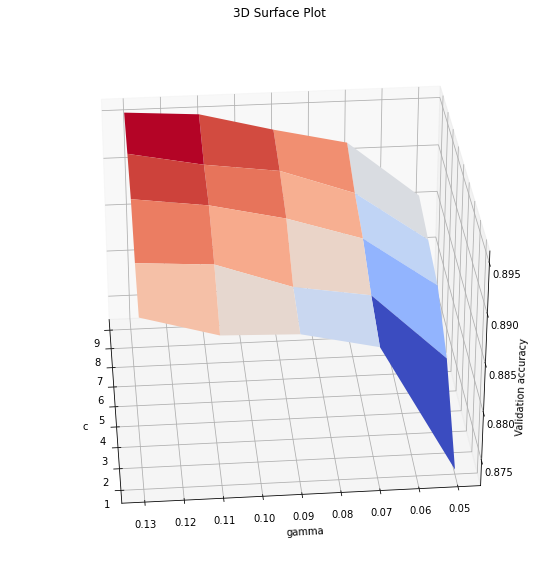

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# create 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# create data for surface plot
X = C_range
Y = gamma_range
X, Y = np.meshgrid(X, Y)

Z = accuracies

# plot surface
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# set labels and title
ax.set_xlabel('c')
ax.set_ylabel('gamma')
ax.set_zlabel('Validation accuracy')
ax.set_title('3D Surface Plot')

ax.view_init(elev=30, azim=175)
# show plot
plt.show()

###### Test accuracy with C and gamma after grid search

In [34]:
param_str = f'-t 2 -c {best_C} -g {best_gamma} -b 1'
prob = svm_parameter(param_str)
model = get_models(Data_X_train,Data_Y_train,param_str,5)

In [35]:
acc = testSVM(Data_X_test,Data_Y_test,5, model)

Accuracy = 90.2889% (8126/9000) (classification)


##### B)Without Slack(C=INF)

In [36]:
c_value=np.inf

In [37]:
param_str = f'-t 2 -c {c_value} -g {best_gamma} -b 1'
prob = svm_problem(Data_Y_train,Data_X_train)
param = svm_parameter(param_str)
model = svm_train(prob,param,'-e 1')

In [38]:
acc = testSVM(Data_X_test,Data_Y_test,5, model)

Accuracy = 88.7556% (7988/9000) (classification)


### POLYNOMIAL KERNEL

In [24]:
C_range = [0.1, 1, 10]
gamma_range = [0.001, 0.01, 0.1, 1]
degree_range = [2, 3, 4]

# Perform grid search
best_accuracy = 0
for degree in degree_range:
    for gamma in gamma_range:
        for C in C_range:
            print("C:",C)
            print("Gamma:",gamma)
            print("Degree:",degree)
            # Train model
            param_str = f'-t 1 -d {degree} -c {C} -g {gamma}'
            model = svm_train(Data_Y_train, Data_X_train, param_str)

            # Evaluate model
            _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val, model)
            if accuracy[0] > best_accuracy:
                best_accuracy = accuracy[0]
                best_params = {'C': C, 'gamma': gamma, 'degree': degree}
            print('-----------------')

print(f'Best Validation accuracy: {best_accuracy:.2f} with params: {best_params}')

C: 0.1
Gamma: 0.001
Degree: 2
Accuracy = 57.2143% (2403/4200) (classification)
-----------------
C: 1
Gamma: 0.001
Degree: 2
Accuracy = 57.2143% (2403/4200) (classification)
-----------------
C: 10
Gamma: 0.001
Degree: 2
Accuracy = 57.2143% (2403/4200) (classification)
-----------------
C: 0.1
Gamma: 0.01
Degree: 2
Accuracy = 57.2143% (2403/4200) (classification)
-----------------
C: 1
Gamma: 0.01
Degree: 2
Accuracy = 57.2143% (2403/4200) (classification)
-----------------
C: 10
Gamma: 0.01
Degree: 2
Accuracy = 73.1905% (3074/4200) (classification)
-----------------
C: 0.1
Gamma: 0.1
Degree: 2
Accuracy = 73.1905% (3074/4200) (classification)
-----------------
C: 1
Gamma: 0.1
Degree: 2
Accuracy = 85.119% (3575/4200) (classification)
-----------------
C: 10
Gamma: 0.1
Degree: 2
Accuracy = 88.8333% (3731/4200) (classification)
-----------------
C: 0.1
Gamma: 1
Degree: 2
Accuracy = 88.8333% (3731/4200) (classification)
-----------------
C: 1
Gamma: 1
Degree: 2
Accuracy = 89.9762% (3779/420

###### Test accuracy with C ,gamma,degree after grid search

In [25]:
best_C=best_params['C']
best_gamma=best_params['gamma']
best_degree=best_params['degree']
param_str = f'-t 1 -d {best_degree} -c {best_C} -g {best_gamma}'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [26]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 90.0444% (8104/9000) (classification)


##### B)Without Slack(C=INF)

In [48]:
c_val=np.inf
best_gamma=best_params['gamma']
best_degree=best_params['degree']
param_str = f'-t 1 -d 3 -c {c_val} -g 0.001'
model = svm_train(Data_Y_train, Data_X_train, param_str)

In [28]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 87.2889% (7856/9000) (classification)


### Linear kernel

In [24]:
c_values = [0.1,1,2,3,4,5,6,7,8,9,10,20]
accuracy_list = []
best_c=-1
best_accuracy=-np.inf
# perform grid search
for c in c_values:
    print("c:",c)
    param = f'-s 0 -t 0 -c {c}'
    model = svm_train(Data_Y_train, Data_X_train,param)
      # Evaluate model
    _, accuracy, _ = svm_predict(Data_Y_val, Data_X_val,model)
    accuracy_list.append(accuracy[0])
    if accuracy[0] > best_accuracy:
        best_accuracy = accuracy[0]
        best_c=c
    print('-----------------')


print(f'Best Validation accuracy: {best_accuracy:.2f} with c: {best_c}')

# train svm model
param = f'-s 0 -t 0 -c {best_c}'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param)



c: 0.1
Accuracy = 86.7857% (3645/4200) (classification)
-----------------
c: 1
Accuracy = 88.0238% (3697/4200) (classification)
-----------------
c: 2
Accuracy = 88.381% (3712/4200) (classification)
-----------------
c: 3
Accuracy = 88.381% (3712/4200) (classification)
-----------------
c: 4
Accuracy = 88.3571% (3711/4200) (classification)
-----------------
c: 5
Accuracy = 88.4524% (3715/4200) (classification)
-----------------
c: 6
Accuracy = 88.4048% (3713/4200) (classification)
-----------------
c: 7
Accuracy = 88.4048% (3713/4200) (classification)
-----------------
c: 8
Accuracy = 88.4286% (3714/4200) (classification)
-----------------
c: 9
Accuracy = 88.4524% (3715/4200) (classification)
-----------------
c: 10
Accuracy = 88.4048% (3713/4200) (classification)
-----------------
c: 20
Accuracy = 88.2143% (3705/4200) (classification)
-----------------
Best Validation accuracy: 88.45 with c: 5


##### Grid search plot for linear kernel ('c' vs validation accuracy)

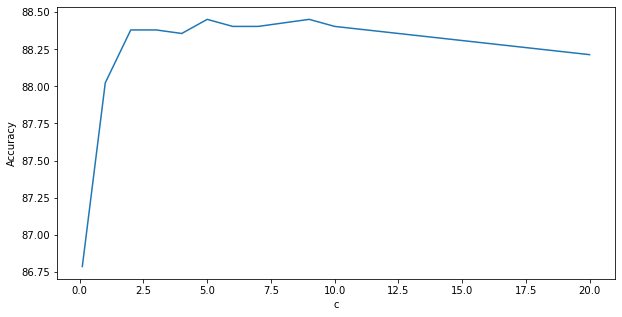

In [21]:
fig = plt.figure(figsize = (10,5))
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.plot(c_values,accuracy_list)
#grid search plot is given below

##### Test accuracy with C ,gamma,degree after grid search 

In [25]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 87.3333% (7860/9000) (classification)


##### B)Without Slack(C=INF)

In [22]:
# train svm model
c=1e6
param = f'-s 0 -t 0 -c {c}'
prob = svm_problem(Data_Y_train, Data_X_train)
model = svm_train(prob, param,'-e 1')

In [23]:
_, accuracy, _ = svm_predict(Data_Y_test, Data_X_test, model)

Accuracy = 86.4444% (7780/9000) (classification)
